In [2]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

C:\Users\HP\AppData\Local\Temp\ipykernel_75860\3147036435.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(TICKER, start="1993-01-01")
[*********************100%***********************]  1 of 1 completed


Price            Close        High         Low        Open    Volume  \
Date                                                                   
2025-12-26  690.309998  691.659973  689.270020  690.640015  41613300   
2025-12-29  687.849976  689.200012  686.070007  687.539978  62559500   
2025-12-30  687.010010  688.559998  686.580017  687.450012  47160700   
2025-12-31  681.919983  687.359985  681.710022  687.140015  74144800   
2026-01-02  683.169983  686.869995  679.820007  685.710022  89310400   

Price             RSI  Strategy  Asset_Returns  Strategy_Returns  
Date                                                              
2025-12-26  59.153564       0.0      26.385721          0.533168  
2025-12-29  61.235783       0.0      26.288127          0.533168  
2025-12-30  64.058287       0.0      26.254805          0.533168  
2025-12-31  60.091886       0.0      26.052875          0.533168  
2026-01-02  66.885090       0.0      26.102465          0.533168  


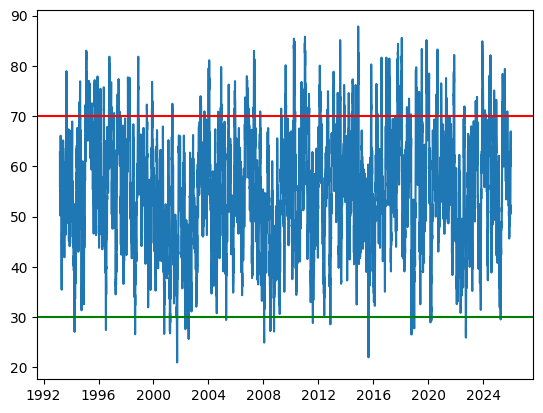

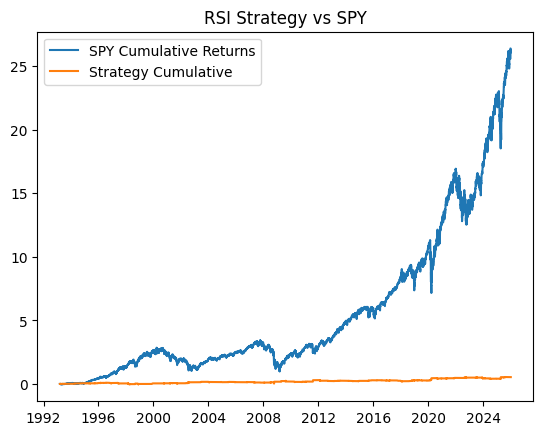

In [47]:
TICKER = 'SPY'
RSI_LENGTH = 28
OVERBOUGHT = 70
OVERSOLD = 30
LOOKBACK = 10000

def get_data(TICKER):
    df = yf.download(TICKER, start="1993-01-01") 
    df.columns = df.columns.get_level_values(0)

    # only return the subset of data you are interested in
    return df.iloc[-LOOKBACK:, :]

def add_RSI(df, length = RSI_LENGTH):
    price_change = df['Close'].diff()
    # separategains/losses
    gain = price_change.where(price_change > 0, 0)
    loss = -price_change.where(price_change < 0, 0) #negative sign i crucial to factor in loss

    # average gain vs loss
    avg_gain = gain.rolling(window = length).mean()
    avg_loss = loss.rolling(window = length).mean()

    rs= avg_gain/avg_loss
    rsi = 100 - (100 /(1 + rs))

    df['RSI'] = rsi

    #plot thenrelative strength index
    plt.plot(df['RSI'])
    plt.axhline(OVERBOUGHT, color = 'red')
    plt.axhline(OVERSOLD, color = 'green')

    return df.dropna()

def add_strategy(df, overbought = OVERBOUGHT, oversold= OVERSOLD):
    df['Strategy'] = 0
    df['Strategy'] = np.where(df['RSI'] > overbought, -1,
                     np.where(df['RSI'] < oversold, 1, 0))

    #shift back to make sure we have sen the signal
    df['Strategy'] = df['Strategy'].shift(1)

    return df

def test_strategy(df):
    df['Asset_Returns'] = (1+ df['Close']. pct_change()).cumprod() - 1
    df['Strategy_Returns'] = (1+ df['Close']. pct_change() * df['Strategy']).cumprod() - 1

    #plot the strategy returns
    plt.figure()
    plt.plot(df['Asset_Returns'])
    plt.plot(df['Strategy_Returns'])
    plt.legend([f'{TICKER} Cumulative Returns', 'Strategy Cumulative'])
    plt.title(f'RSI Strategy vs {TICKER}')
    return df

def main():
    df = get_data(TICKER)
    df = add_RSI(df)
    df = add_strategy(df, overbought = OVERBOUGHT, oversold= OVERSOLD)
    df = test_strategy(df)
    print(df.tail())

    return df
df = main()


KeyError: 'Strategy'